In [1]:
import pandas as pd


In [69]:
df=pd.read_csv('/content/insurance.csv')

In [70]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#Podział na płeć.
Analiza danych o płci męskiej


In [86]:
df_male=df[df['sex']=='male']

In [87]:
df_male

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [88]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 1 to 1333
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       676 non-null    int64  
 1   sex       676 non-null    object 
 2   bmi       676 non-null    float64
 3   children  676 non-null    int64  
 4   smoker    676 non-null    object 
 5   region    676 non-null    object 
 6   charges   676 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 42.2+ KB


In [89]:
set(df_male['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [90]:
df_male.describe()

,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


#Zmiana typów danych w kolumjnie 'Smoker' z object na float

In [91]:
df_male['smoker'] = df_male['smoker'].replace({'yes': 1, 'no': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
df_male['smoker']=df_male['smoker'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 1 to 1333
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       676 non-null    int64  
 1   sex       676 non-null    object 
 2   bmi       676 non-null    float64
 3   children  676 non-null    int64  
 4   smoker    676 non-null    float64
 5   region    676 non-null    object 
 6   charges   676 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 42.2+ KB


In [94]:
df_male.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,0.0,southeast,1725.55230
2,28,male,33.000,3,0.0,southeast,4449.46200
3,33,male,22.705,0,0.0,northwest,21984.47061
4,32,male,28.880,0,0.0,northwest,3866.85520
8,37,male,29.830,2,0.0,northeast,6406.41070


#Podział meżczyzn wg palących i niepalących

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Podział mężczyzn na palących i niepalących')

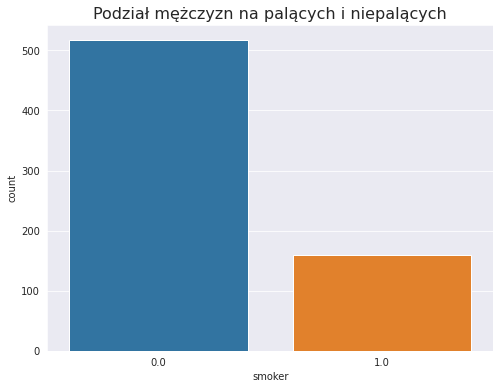

In [96]:
plt.figure(figsize=(8,6))
sns.countplot(x='smoker', data=df_male)
plt.title('Podział mężczyzn na palących i niepalących', fontsize=16)

In [97]:
df_male['smoker'].value_counts()

0.0    517
1.0    159
Name: smoker, dtype: int64

Znaczna przewaga męzczyzn niepalących


#Analiza średniej wartości składki ubezpieczeniowej pod kątem palaczy

In [98]:
df_male.groupby('smoker', as_index=False)['charges'].mean()

,smoker,charges
0,0.0,8087.204731
1,1.0,33042.005975


In [99]:
#Minimalna i maksymalna stawka ubezpieczenia w grupie palących i niepalących
df_male.groupby('smoker').agg(
    {
        'charges':[min, max],
    }
)

charges             
               min          max
smoker                         
0.0      1121.8739  32108.66282
1.0     12829.4551  62592.87309

Minimalna składka dla mężczyzn palących jest znacznie wyższa, niż u mężczyzn niepalących

<Figure size 720x432 with 0 Axes>

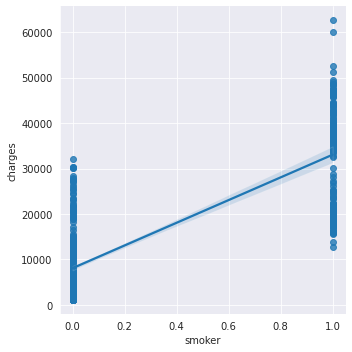

In [100]:
plt.figure(figsize=(10,6))
sns.lmplot(x='smoker', y='charges', data=df_male)
sns.set_style('darkgrid')

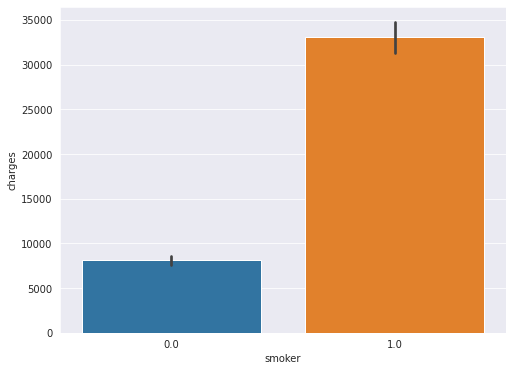

In [101]:
#dlaczego ten nie wychodzi? Inne stawki
plt.figure(figsize=(8,6))
sns.barplot(x='smoker', y='charges', data=df_male)
sns.set_style('darkgrid')

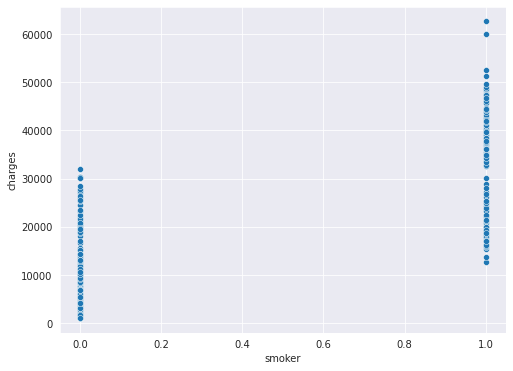

In [102]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='smoker', y='charges', data=df_male)
sns.set_style('darkgrid')

Po powyższych wykresach widać odstające dane tzn. wysokość opłaty dla mężczyzn palących

#Podział meżczyzn ze wzgledu na wiek, dodanie kolumny opisowej 

In [103]:
df_male.describe()

,age,bmi,children,smoker,charges
count,676.000000,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,0.235207,13956.751178
std,14.050141,6.140435,1.218986,0.424442,12971.025915
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,0.000000,9369.615750
75%,51.000000,34.992500,2.000000,0.000000,18989.590250
max,64.000000,53.130000,5.000000,1.000000,62592.873090


In [104]:
df_male['age_description']=pd.cut(df_male['age'], bins=[17,25, 35, 50, 64], labels=['młodzi_dorośli', 'starsi_dorośli', 'średni_wiek', 'seniorzy' ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
df_male.sample(5)

,age,sex,bmi,children,smoker,region,charges,age_description
1028,54,male,31.60,0,0.0,southwest,9850.4320,seniorzy
840,21,male,31.10,0,0.0,southwest,1526.3120,młodzi_dorośli
336,60,male,25.74,0,0.0,southeast,12142.5786,seniorzy
545,49,male,25.84,2,1.0,northwest,23807.2406,średni_wiek
939,53,male,29.48,0,0.0,southeast,9487.6442,seniorzy


Text(0.5, 1.0, 'Kategoria wiekowa')

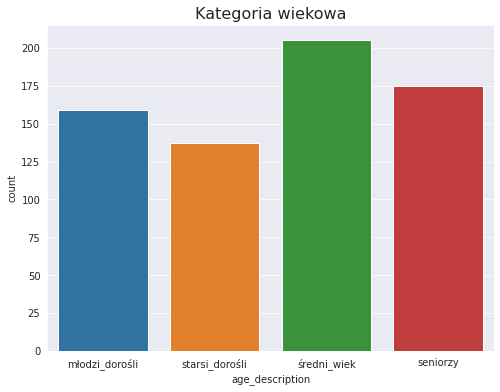

In [106]:
plt.figure(figsize=(8,6))
sns.countplot(x='age_description', data=df_male)
plt.title('Kategoria wiekowa', fontsize=16)

Zdecydowaną większośc ubezpieczonych stanowią męzczyźni w średnim wieku

#Analiza wysokości ubezpieczenia w stosunku do wieku

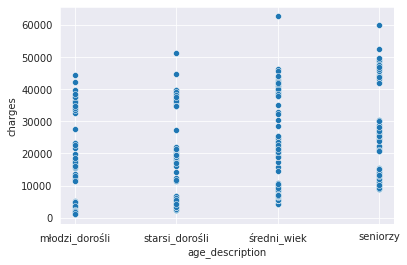

In [107]:
sns.scatterplot(x='age_description', y='charges', data=df_male)

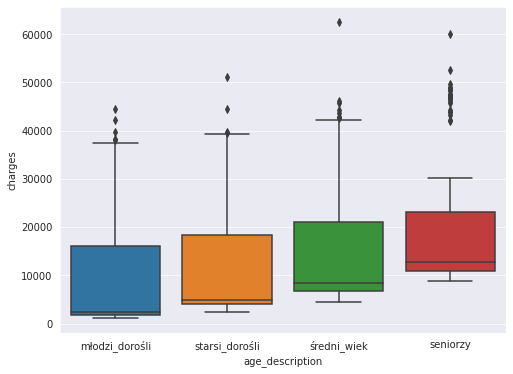

In [108]:
plt.figure(figsize=(8,6))
sns.boxplot(x='age_description', y='charges', data=df_male)

Znaczne odchylenie wysokości składki występuje w grupie "średni_wiek"

#Analiza grupy 'Średni wiek"


In [109]:

średni_wiek=df_male[df_male['age_description']=='średni_wiek']

In [110]:
średni_wiek=średni_wiek.sort_values('charges',ascending=True)

In [111]:
średni_wiek.tail(5)

,age,sex,bmi,children,smoker,region,charges,age_description
185,36,male,41.895,3,1.0,northeast,43753.33705,średni_wiek
893,47,male,38.940,2,1.0,southeast,44202.65360,średni_wiek
569,48,male,40.565,2,1.0,northwest,45702.02235,średni_wiek
265,46,male,42.350,3,1.0,southeast,46151.12450,średni_wiek
1300,45,male,30.360,0,1.0,southeast,62592.87309,średni_wiek


Powyżej zauwazyć można, że dane mężczyzny o indekcie 1300 nie różnią się znacznie od mężczyzny o indeksie 265 czy 569. Zwrócić należy uwagę, iż jego bmi jest nawet niższe od pozostałych, co sugeruje, że składka została błędnie wprowadzona. 
Zanim usuniemy dane odstające, sprawdzimy wpływ bmi oraz ilość dzieci na stawkę ubezpieczenia.

#Analiza odchylenia w grupie seniorzy

In [112]:
seniorzy=df_male[df_male['age_description']=='seniorzy']

In [113]:
seniorzy=seniorzy.sort_values('charges',ascending=True)

In [114]:
seniorzy.tail(10)

,age,sex,bmi,children,smoker,region,charges,age_description
951,51,male,42.900,2,1.0,southeast,47462.89400,seniorzy
55,58,male,36.955,2,1.0,northwest,47496.49445,seniorzy
39,60,male,39.900,0,1.0,southwest,48173.36100,seniorzy
281,54,male,40.565,3,1.0,northeast,48549.17835,seniorzy
901,60,male,40.920,0,1.0,southeast,48673.55880,seniorzy
530,57,male,42.130,1,1.0,southeast,48675.51770,seniorzy
1062,59,male,41.140,1,1.0,southeast,48970.24760,seniorzy
1241,64,male,36.960,2,1.0,southeast,49577.66240,seniorzy
1146,60,male,32.800,0,1.0,southwest,52590.82939,seniorzy
1230,52,male,34.485,3,1.0,northwest,60021.39897,seniorzy


In [115]:
seniorzy[(seniorzy['age']==52) & (seniorzy['smoker']==1)]

,age,sex,bmi,children,smoker,region,charges,age_description
331,52,male,27.360,0,1.0,northwest,24393.62240,seniorzy
262,52,male,24.320,3,1.0,northeast,24869.83680,seniorzy
1240,52,male,41.800,2,1.0,southeast,47269.85400,seniorzy
1230,52,male,34.485,3,1.0,northwest,60021.39897,seniorzy


Po powyższych zestawieniach widać, że wysokość składki mężczyzny z indeksem 1230 jest znacznie wyższa niż męzczyzn w tym samym wieku, również palących.


#Analiza wysokości ubezpieczenia w stosunku do ilości posiadanych dzieci oraz regionu pochodzenia

In [116]:
df_male.groupby('children', as_index=False)['charges'].mean()

,children,charges
0,0,12832.696736
1,1,13273.522458
2,2,16187.095325
3,3,16789.167419
4,4,13782.284829
5,5,7931.658310


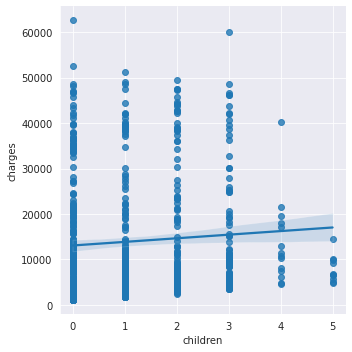

In [161]:
sns.lmplot(x='children', y='charges', data=df_male)

Z powyższej tabeli wynika, że ilość dzieci nie ma wpływu na wysokość ubezpieczenia.

In [117]:
df_male.groupby('region', as_index=False)['charges'].mean()

,region,charges
0,northeast,13854.005374
1,northwest,12354.119575
2,southeast,15879.617173
3,southwest,13412.883576


Z powyższej tabeli wynika, że region pochodzenia nie ma wpływu na wysokość ubezpieczenia.

#Analiza wysokości ubezpieczenia w stosunku do bmi

In [118]:
df_male.describe()

,age,bmi,children,smoker,charges
count,676.000000,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,0.235207,13956.751178
std,14.050141,6.140435,1.218986,0.424442,12971.025915
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,0.000000,9369.615750
75%,51.000000,34.992500,2.000000,0.000000,18989.590250
max,64.000000,53.130000,5.000000,1.000000,62592.873090


In [119]:
df_male.head()

,age,sex,bmi,children,smoker,region,charges,age_description
1,18,male,33.770,1,0.0,southeast,1725.55230,młodzi_dorośli
2,28,male,33.000,3,0.0,southeast,4449.46200,starsi_dorośli
3,33,male,22.705,0,0.0,northwest,21984.47061,starsi_dorośli
4,32,male,28.880,0,0.0,northwest,3866.85520,starsi_dorośli
8,37,male,29.830,2,0.0,northeast,6406.41070,średni_wiek


In [120]:
df_male.reset_index(inplace = True,drop = True)

In [121]:
description = []
for i in range(len(df_male)):
  if df_male['bmi'][i]<=18.5:
    description.append('niedowaga')
  elif df_male['bmi'][i]>18.5 and df_male['bmi'][i]<=25:
    description.append('norma')
  elif df_male['bmi'][i]>=25 and df_male['bmi'][i]<=35:
    description.append('nadwaga')
  else:
    description.append('otyłość')

In [ ]:
description

In [122]:
df_male['bmi_description']=description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
df_male.head()

,age,sex,bmi,children,smoker,region,charges,age_description,bmi_description
0,18,male,33.770,1,0.0,southeast,1725.55230,młodzi_dorośli,nadwaga
1,28,male,33.000,3,0.0,southeast,4449.46200,starsi_dorośli,nadwaga
2,33,male,22.705,0,0.0,northwest,21984.47061,starsi_dorośli,norma
3,32,male,28.880,0,0.0,northwest,3866.85520,starsi_dorośli,nadwaga
4,37,male,29.830,2,0.0,northeast,6406.41070,średni_wiek,nadwaga


In [127]:
df_male_bmi=df_male.groupby('bmi_description', as_index=False)['charges'].mean()

In [125]:
import plotly.express as px

In [130]:
bar_fig=px.bar(data_frame=df_male, y='bmi_description', x='charges', color='age_description', orientation='h', title="Wysokość ubezpieczenia a bmi")
bar_fig.update_layout({'bargap':0.5})
bar_fig.show()



In [54]:
px.bar(data_frame=df_male, x='bmi_description', y='charges', title="Wysokość ubezpieczenia a bmi", text_auto=True, color='age_description')

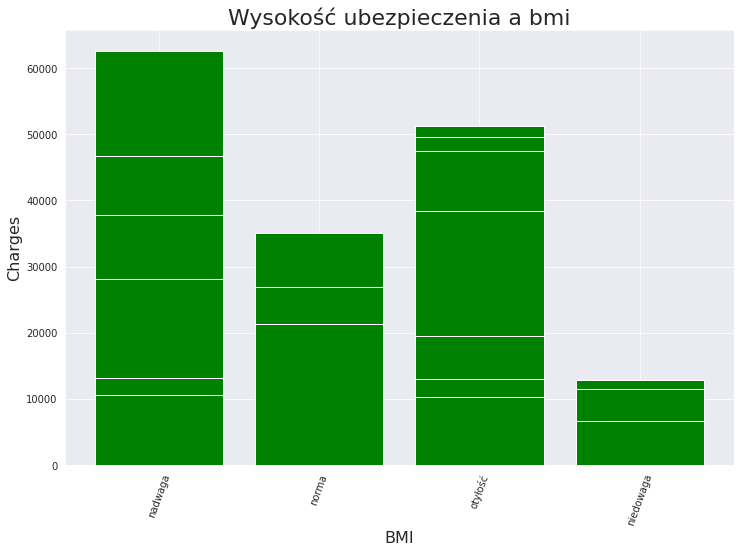

In [131]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df_male['bmi_description'], df_male['charges'], color='g')
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('BMI', fontsize=16)
ax.set_ylabel('Charges', fontsize=16)
ax.set_title("Wysokość ubezpieczenia a bmi", fontsize=22)
plt.show()


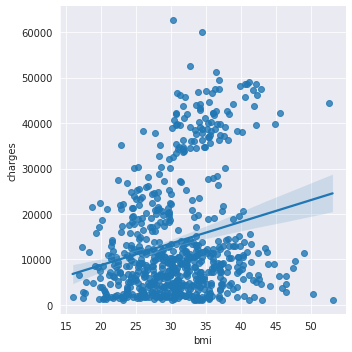

In [164]:
sns.lmplot(x='bmi', y='charges', data=df_male)

In [132]:
df_male.head()

,age,sex,bmi,children,smoker,region,charges,age_description,bmi_description
0,18,male,33.770,1,0.0,southeast,1725.55230,młodzi_dorośli,nadwaga
1,28,male,33.000,3,0.0,southeast,4449.46200,starsi_dorośli,nadwaga
2,33,male,22.705,0,0.0,northwest,21984.47061,starsi_dorośli,norma
3,32,male,28.880,0,0.0,northwest,3866.85520,starsi_dorośli,nadwaga
4,37,male,29.830,2,0.0,northeast,6406.41070,średni_wiek,nadwaga


Z powyższych danych wynika, że BMI ma znaczny wpływ na wysokość ubezpieczenia 

#Oczyszczanie danych

In [134]:
df_male_clean=df_male[df_male['charges']!=62592.87309]

In [ ]:
df_male_clean.describe()

In [136]:
df_male_clean2=df_male[df_male['charges']!=60021.39897]

In [137]:
df_male_clean2.describe()

,age,bmi,children,smoker,charges
count,675.000000,675.000000,675.000000,675.000000,675.000000
mean,38.897778,30.937881,1.112593,0.234074,13888.507255
std,14.051513,6.143471,1.217725,0.423733,12858.622715
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,0.000000,4591.509000
50%,39.000000,30.685000,1.000000,0.000000,9361.326800
75%,51.000000,35.025000,2.000000,0.000000,18967.833460
max,64.000000,53.130000,5.000000,1.000000,62592.873090


#Mapa ciepła

In [139]:
corr=df_male_clean2.corr()

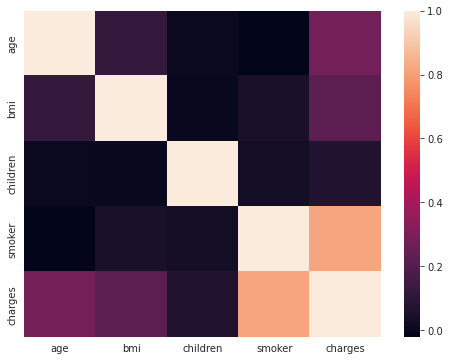

In [140]:
plt.figure(figsize=(8,6))
sns.heatmap(corr)

#Regresja liniowa

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold 
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

In [180]:
X=df_male_clean2[['smoker', 'bmi', 'age']]

In [181]:
y=df_male_clean2['charges']

In [182]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [183]:
print(X_train.shape, X_test.shape)

(540, 3) (135, 3)


In [184]:
model_lin1=LinearRegression()
model_lin1.fit(X_train, y_train)

LinearRegression()

In [185]:
y_pred_train1=model_lin1.predict(X_train)

In [186]:
y_pred_test1=model_lin1.predict(X_test)

In [187]:
r2_score(y_test, y_pred_test1)

0.7934130669648521

In [188]:
bias_train=mean_absolute_percentage_error(y_train, y_pred_train1)
print(bias_train)

0.43821969009987066


In [189]:
bias_test=mean_absolute_percentage_error(y_test, y_pred_test1)
print(bias_test)

0.4668363143680658


#Regresja Liniowa test drugi

In [190]:
X1=df_male_clean2[['smoker', 'bmi', 'age', 'children']]

In [191]:
y1=df_male_clean2['charges']

In [214]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X, y, test_size=0.3, random_state=123)

In [215]:
print(X1_train.shape, X1_test.shape)

(472, 3) (203, 3)


In [216]:
model_lin1=LinearRegression()
model_lin1.fit(X1_train, y1_train)

LinearRegression()

In [217]:
y1_pred_train1=model_lin1.predict(X1_train)

In [218]:
y1_pred_test1=model_lin1.predict(X1_test)

In [219]:
r2_score(y1_test, y1_pred_test1)

0.803924459223528

In [206]:
bias_train=mean_absolute_percentage_error(y1_train, y1_pred_train1)
print(bias_train)

0.4570691041198565


In [207]:
bias_test=mean_absolute_percentage_error(y1_test, y1_pred_test1)
print(bias_test)

0.47104453079543945


#Drzewo decyzyjne

In [153]:
model_tree=DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [154]:
y_pred_test2=model_tree.predict(X_test)

In [155]:
r2_score(y_test, y_pred_test2)

0.7950706617328372

In [156]:
model_tree.get_depth()

18

In [157]:
model_tree.get_n_leaves()

540

In [158]:
model_tree=DecisionTreeRegressor(max_depth=20)
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [159]:
y_pred_test2=model_tree.predict(X_test)

In [160]:
r2_score(y_test, y_pred_test2)

0.7877792652596168

#Walidacja krzyżowa

In [165]:
from sklearn.model_selection import cross_val_score

In [166]:
lin_model=LinearRegression()
scores=cross_val_score(lin_model, X, y, cv=10)

In [167]:
scores

array([0.77443018, 0.80508404, 0.7340406 , 0.757891  , 0.86526949,
       0.74814475, 0.78223059, 0.62407324, 0.82663647, 0.77088649])